In [1]:
"""
Notebook that was used to generate the paths of the example processes in Chapter 2 (Section 2.2) 
and the example models in Chapter 3 (Section 3.3)
"""

from OptionPricing import *
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
lwidth = 1
lcolor = 'black'

In [3]:
np.random.seed(seed=123)

In [4]:
def generate_correlation(d):
    eigen = np.random.rand(d)
    eigen *= d / eigen.sum()
    return sp.random_correlation.rvs(eigen)

## 1. Poisson Processes

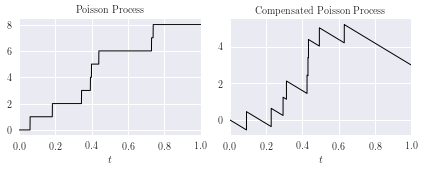

In [5]:
# Poisson & Compensated Poisson Processes

lam = 6
T = 1
poissonProcess = PoissonProcess(lam=lam, T=T)
poissonProcessCom = PoissonProcess(lam=lam, T=T, compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(poissonProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(poissonProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Poisson Process', fontsize=10)
ax[1].set_title('Compensated Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\poissonPaths.pdf')

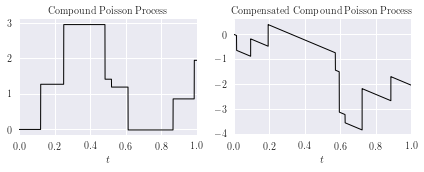

In [6]:
# Compound Poisson & Compensated Compound Poisson Processes

lam = 6
T = 1
mu_Y = 0.5
sig_Y = 1
compoiProcess = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y))
compoiProcessCom = CompoundPoissonProcess(lam=lam, T=T, jumpSizeRV=sp.norm(loc=mu_Y, scale=sig_Y), compensated=True)

fig, ax = plt.subplots(1, 2, figsize=(6,2.5))
fig.tight_layout()
ax[0].margins(x=0)
ax[1].margins(x=0)
ax[0].plot(compoiProcess.generatePaths(), lw=lwidth, c=lcolor)
ax[1].plot(compoiProcessCom.generatePaths(), lw=lwidth, c=lcolor)
ax[0].set_title('Compound Poisson Process', fontsize=10)
ax[1].set_title('Compensated Compound Poisson Process', fontsize=10)
ax[0].set_xlabel('$t$')
ax[1].set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\compoissonPaths.pdf')

## 2. Merton Model

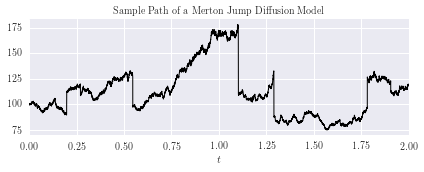

In [7]:
lam = 4
mu_Y = -0.1
sig_Y = 0.2
sigma = 0.25
r = 0.05
s0 = 100
T = 2
mertonModel = MertonModel(lam=lam, mu_j=mu_Y, sig_j=sig_Y, sigma=sigma, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(mertonModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Merton Jump Diffusion Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\mertonJDPath.pdf')

## 3. NIG Model

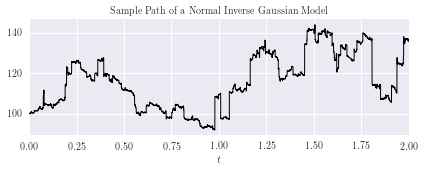

In [8]:
theta = 0.1
sigma = 0.4
kappa = 0.2
r = 0.05
s0 = 100
T = 2
nigModel = NIGModel(theta=theta, sigma=sigma, kappa=kappa, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(nigModel.generatePaths(), lw=lwidth, c=lcolor)
ax.set_title('Sample Path of a Normal Inverse Gaussian Model', fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\nigPath.pdf')

## 4. Multi Asset Merton Model

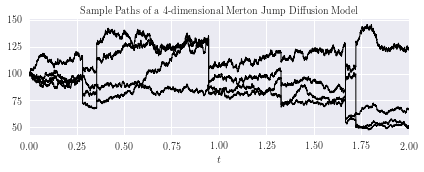

In [9]:
d = 4
lam = 3
mu_j = np.array([-0.1] * d)
sig_j = np.array([0.2] * d)
sig_bm = np.array([0.25] * d)
np.random.seed(seed=321)
Corr_j = generate_correlation(d)
Corr_bm = generate_correlation(d)
r = 0.05
s0 = 100
T = 2

multiMertonModel = MultiAssetMertonModel(d=d, lam=lam, mu_j=mu_j, sig_j=sig_j, sig_bm=sig_bm, 
                                         Corr_j=Corr_j, Corr_bm=Corr_bm, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(multiMertonModel.generatePath(), lw=lwidth, c=lcolor)
ax.set_title('Sample Paths of a ${}$-dimensional Merton Jump Diffusion Model'.format(d), fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\multiMertonJDPath.pdf')

In [10]:
multiMertonModel.x0

array([[100.],
       [100.],
       [100.],
       [100.]])

In [11]:
cov_j = np.diag(sig_j) @ Corr_j @ np.diag(sig_j)
cov_bm = np.diag(sig_bm) @ Corr_bm @ np.diag(sig_bm)
print(np.round(cov_j, 3))
print(np.round(cov_bm, 3))

[[ 0.04  -0.023 -0.013  0.008]
 [-0.023  0.04  -0.001 -0.012]
 [-0.013 -0.001  0.04   0.027]
 [ 0.008 -0.012  0.027  0.04 ]]
[[ 0.063  0.043 -0.004  0.001]
 [ 0.043  0.062 -0.023 -0.012]
 [-0.004 -0.023  0.063  0.021]
 [ 0.001 -0.012  0.021  0.063]]


## 5. Multi Asset NIG Model

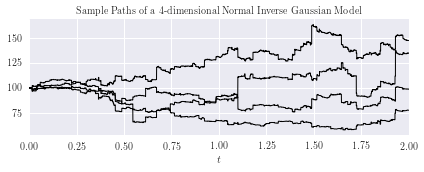

In [12]:
d = 4
theta = np.array([0.1] * d)
sigma = np.array([0.25] * d)
kappa = 0.2
r = 0.05
s0 = 100
T = 2
multiNigModel = MultiAssetNIGModel(d=d, theta=theta, sigma=sigma, kappa=kappa, Corr=Corr_bm, r=r, s0=s0, T=T)

fig = plt.figure(figsize=(6, 2.5))
ax = fig.add_subplot()
fig.tight_layout()
ax.margins(x=0)
ax.plot(multiNigModel.generatePath(), lw=lwidth, c=lcolor)
ax.set_title('Sample Paths of a ${}$-dimensional Normal Inverse Gaussian Model'.format(d), fontsize=10)
ax.set_xlabel('$t$')
plt.tight_layout()
plt.savefig('C:\\Users\\oli-w\\OneDrive\\Uni\\Master Thesis\\LaTeX Template\\multiNigPath.pdf')